In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [2]:
from os import listdir
from os.path import isfile, join
audiodir = 'audio/'
filenames = [f for f in listdir(audiodir) if isfile(join(audiodir, f))]
print(filenames)

['Teste Ruido-008.wav', 'Teste Ruido-007.wav', 'Teste Ruido-006.wav', 'Teste Ruido-001.wav', 'Teste Ruido-005.wav', 'Teste Ruido-003.wav', 'Teste Ruido-004.wav', 'Teste Ruido-002.wav']


<Figure size 432x288 with 0 Axes>

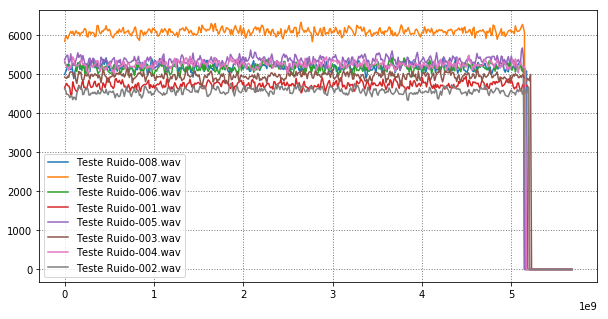

In [3]:
#rms([y, S, frame_length, hop_length, …])	Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.
#spectral_centroid([y, sr, S, n_fft, …])	Compute the spectral centroid.
#spectral_flatness([y, S, n_fft, hop_length, …])	Compute spectral flatness
#spectral_rolloff([y, sr, S, n_fft, …])	Compute roll-off frequency.

plt.figure()
plt.figure(figsize=(10,5))
plt.grid(color='gray', linestyle=':', linewidth=1)

for i in range(8): # Change the range to plot more samples
  y, sr = librosa.load(audiodir+ filenames[i])
  S = np.abs(librosa.stft(y))
  t = np.linspace(0, len(y)*sr, S.shape[1])
  feat = librosa.feature.spectral_centroid(S=S)
  plt.plot(t, feat.T, label=filenames[i])

plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

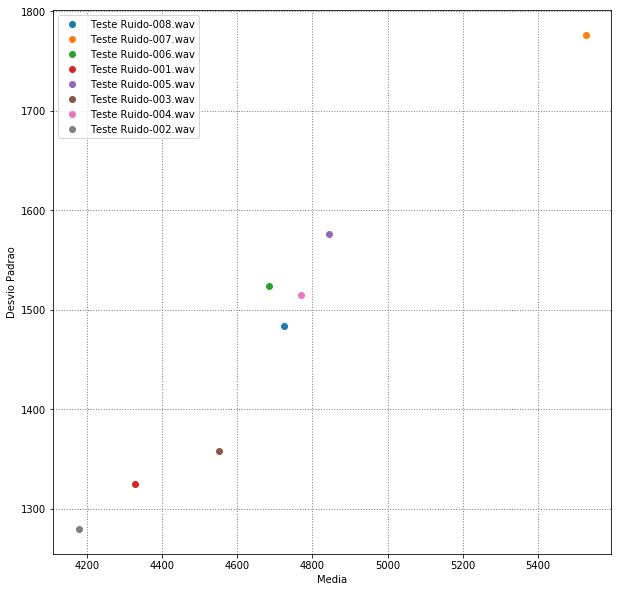

In [4]:
plt.figure()
plt.figure(figsize=(10,10))
plt.grid(color='gray', linestyle=':', linewidth=1)

for i in range(8):
  y, sr = librosa.load(audiodir+filenames[i])
  S = np.abs(librosa.stft(y))
  t = np.linspace(0, len(y)*sr, S.shape[1])
  feat = librosa.feature.spectral_centroid(S=S)
  feat_mean = np.mean(feat)
  feat_std = np.std(feat)
  plt.plot(feat_mean, feat_std, 'o', label=filenames[i])

plt.xlabel('Media')
plt.ylabel('Desvio Padrao')
plt.legend()
plt.show()